## Housing Price Prediction Notebook



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("D:/Data Science/Housing Price Prediction/housing_price_dataset.csv")

In [30]:
df.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [31]:
df.isnull().sum().sort_values()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [32]:
df.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

In [33]:
df.head(10)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
5,2095,2,3,Suburb,2020,198208.803907
6,2724,2,1,Suburb,1993,343429.319110
7,2044,4,3,Rural,1957,184992.321268
8,2638,4,3,Urban,1959,377998.588152
9,1121,5,2,Urban,2004,95961.926014


In [34]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of        SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0            2126         4          1        Rural       1969  215355.283618
1            2459         3          2        Rural       1980  195014.221626
2            1860         2          1       Suburb       1970  306891.012076
3            2294         2          1        Urban       1996  206786.787153
4            2130         5          2       Suburb       2001  272436.239065
...           ...       ...        ...          ...        ...            ...
49995        1282         5          3        Rural       1975  100080.865895
49996        2854         2          2       Suburb       1988  374507.656727
49997        2979         5          3       Suburb       1962  384110.555590
49998        2596         5          2        Rural       1984  380512.685957
49999        1572         5          3        Rural       2011  221618.583218

[50000 rows x 6 colu

In [35]:
neighborhood_dummies = pd.get_dummies(df['Neighborhood'], drop_first= True)

In [36]:
df.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [37]:
df = pd.concat([df, neighborhood_dummies], axis=1)


In [38]:
df.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price', 'Suburb', 'Urban'],
      dtype='object')

In [40]:
Neighborhood_column = df['Neighborhood'].values
Neighborhood_column

array(['Rural', 'Rural', 'Suburb', ..., 'Suburb', 'Rural', 'Rural'],
      dtype=object)

In [23]:
df = df.drop('Neighborhood' , axis= 1)

In [46]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Calculate the difference (age of the building)
df['BuildingAge'] = current_year - df['YearBuilt']


In [48]:
df.head(10)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,Suburb,Urban,BuildingAge
0,2126,4,1,Rural,1969,215355.283618,False,False,55
1,2459,3,2,Rural,1980,195014.221626,False,False,44
2,1860,2,1,Suburb,1970,306891.012076,True,False,54
3,2294,2,1,Urban,1996,206786.787153,False,True,28
4,2130,5,2,Suburb,2001,272436.239065,True,False,23
5,2095,2,3,Suburb,2020,198208.803907,True,False,4
6,2724,2,1,Suburb,1993,343429.319110,True,False,31
7,2044,4,3,Rural,1957,184992.321268,False,False,67
8,2638,4,3,Urban,1959,377998.588152,False,True,65
9,1121,5,2,Urban,2004,95961.926014,False,True,20


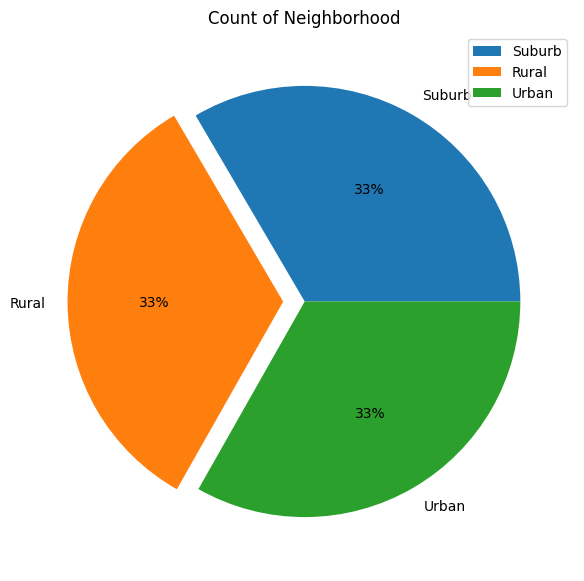

In [108]:
neighborhood_counts = df['Neighborhood'].value_counts()


explode = [0] * len(neighborhood_counts)
explode[1] = 0.1  
colors = sns.color_palette()

plt.figure(figsize=(7, 7))
plt.pie(neighborhood_counts.values, 
        labels=neighborhood_counts.index, 
        autopct='%.0f%%',
        explode=explode, 
        colors=colors)

plt.title("Count of Neighborhood")
plt.legend(loc="best")
plt.show()

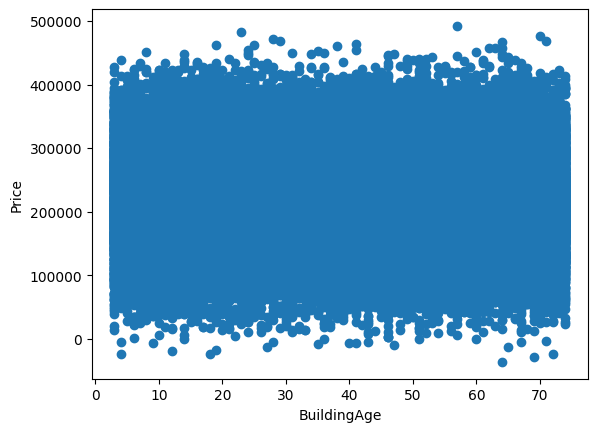

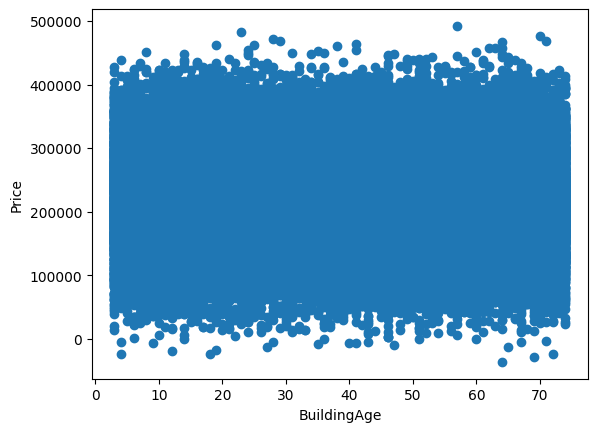

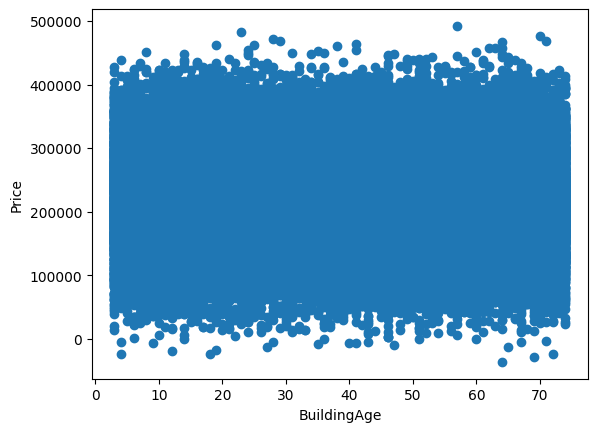

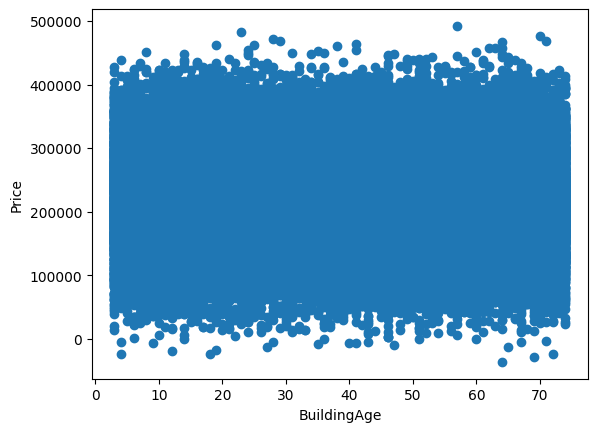

In [65]:
columns = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'BuildingAge']


for columns in columns:
    
    xs = df[column].values
    ys = df['Price'].values
    plt.scatter(xs, ys)
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()


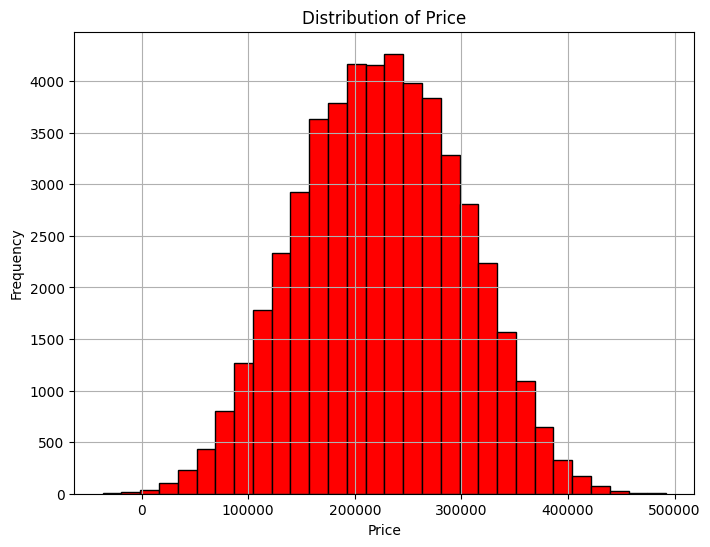

In [106]:
plt.figure(figsize=(8, 6))
plt.hist(df['Price'], bins=30, color='r', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Apparently we need some preprocessing on this data

In [49]:
from scipy.stats import pearsonr

# List of columns to analyze
columns = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'BuildingAge']

# Empty list to store correlation values and p-values
correlation = []

# Iterate over columns and calculate Pearson correlation with 'Price'
for column in columns:
    # Calculate Pearson correlation coefficient and p-value
    corr_value, p_value = pearsonr(df[column], df['Price'])
    # Append the result as a tuple (correlation, p-value)
    correlation.append((column, corr_value, p_value))

# Display the calculated correlation values and p-values
for col, corr, p_val in correlation:
    print(f'Correlation between {col} and Price: {corr}, p-value: {p_val}')


Correlation between SquareFeet and Price: 0.750719785670884, p-value: 0.0
Correlation between Bedrooms and Price: 0.07262393204089636, p-value: 1.888971002015143e-59
Correlation between Bathrooms and Price: 0.02841764814765267, p-value: 2.0774452962290652e-10
Correlation between BuildingAge and Price: 0.0022883242547980212, p-value: 0.6088800701172805


### Now we first Apply a Linear Regression model on all numeric features

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

x = df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'BuildingAge']].values
y = df['Price'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=42)

# train the model
lr.fit(x_train, y_train)

y_hat = lr.predict(x_test)


rmse_lr = mean_squared_error(y_test, y_hat, squared= False)

print(rmse_lr)


lr.score(x_test, y_test)

49497.3046468648


0.5758693975211588

### Now we remove the Feature ['BuildingAge'] to remove some noise

In [63]:
x = df[['SquareFeet', 'Bedrooms', 'Bathrooms']].values
y = df['Price'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=42)

# train the model
lr.fit(x_train, y_train)

y_hat = lr.predict(x_test)


rmse_lr = mean_squared_error(y_test, y_hat, squared= False)

print(rmse_lr)


lr.score(x_test, y_test)

49498.35119521894


0.57585146208489

### The Featue with approximately 0 correlation with the target has no effect as seen

### Let's Try to add Scaler for this problem

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler(copy = True, with_mean = True, with_std = True)
lr = LinearRegression()

pipeline = make_pipeline(scaler, lr)

# train the model
pipeline.fit(x_train, y_train)

y_hat = pipeline.predict(x_test)


rmse_pipeline = mean_squared_error(y_test, y_hat, squared= False)

print(rmse_pipeline)


pipeline.score(x_test, y_test)



49498.35119521893


0.5758514620848901

In [79]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

x = df[['SquareFeet', 'Bedrooms', 'Bathrooms']].values
y = df['Price'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=42)

normalizer = Normalizer()
lr = LinearRegression()

pipeline = make_pipeline(normalizer, lr)

# train the model
pipeline.fit(x_train, y_train)

y_hat = pipeline.predict(x_test)


rmse_pipeline = mean_squared_error(y_test, y_hat, squared= False)

print(rmse_pipeline)


pipeline.score(x_test, y_test)



64809.853670899916


0.27285907106248763

In [75]:
from sklearn.preprocessing import PolynomialFeatures

# Define the degree of the polynomial you want to use
degree = 12

# Create a pipeline that first transforms the data into polynomial features, then applies linear regression
pipeline_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model using the training data
pipeline_poly.fit(x_train, y_train)

# Predict the target values for the test set
y_hat_poly = pipeline_poly.predict(x_test)

# Calculate the RMSE for the polynomial model
rmse_poly = mean_squared_error(y_test, y_hat_poly, squared=False)
print(f"Polynomial RMSE: {rmse_poly}")

# Print the score of the polynomial model
poly_score = pipeline_poly.score(x_test, y_test)
print(f"Polynomial Model Score: {poly_score}")


Polynomial RMSE: 51380.91254911774
Polynomial Model Score: 0.5429748125678933


In [80]:
degree_values = np.arange(1,15)
rmse_results = []
score_results = []

for degree in degree_values:
    n = degree
    # Create a pipeline that first transforms the data into polynomial features, then applies linear regression
    pipeline_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    # Train the model using the training data
    pipeline_poly.fit(x_train, y_train)

    # Predict the target values for the test set
    y_hat_poly = pipeline_poly.predict(x_test)

    rmse_poly = mean_squared_error(y_test, y_hat_poly, squared=False)
    rmse_results.append(rmse_poly)
    
    poly_score = pipeline_poly.score(x_test, y_test)
    score_results.append(poly_score)


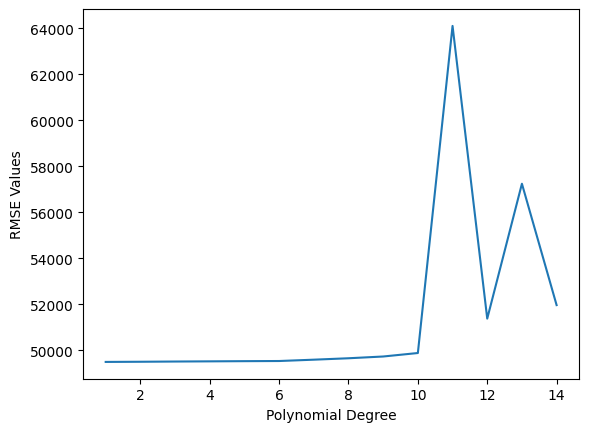

In [81]:
plt.plot(degree_values, rmse_results)
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE Values')
plt.show()

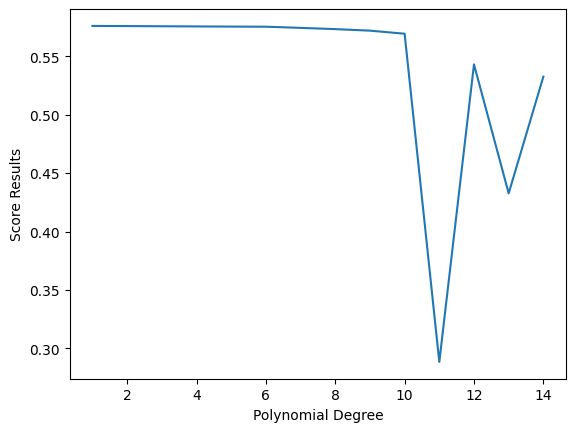

In [82]:
plt.plot(degree_values, score_results)
plt.xlabel('Polynomial Degree')
plt.ylabel('Score Results')
plt.show()

In [90]:
from sklearn.linear_model import Ridge ,Lasso

alpha_values = np.linspace(0.001,1, 20)
rmse_results = []
score_results = []

for alpha in alpha_values:
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_train, y_train)
    
    ridge_score  = ridge.score(x_test, y_test)
    score_results.append(ridge_score)
    
    y_hat_ridge = ridge.predict(x_test)
    
    rmse_ridge = mean_squared_error(y_test, y_hat_ridge)
    rmse_results.append(rmse_ridge)

print(rmse_results)
print(score_results)

[2450086770.731752, 2450086754.2494197, 2450086737.767269, 2450086721.285299, 2450086704.803511, 2450086688.3219047, 2450086671.840479, 2450086655.3592353, 2450086638.8781724, 2450086622.3972917, 2450086605.9165916, 2450086589.436074, 2450086572.9557366, 2450086556.4755816, 2450086539.9956074, 2450086523.515815, 2450086507.0362034, 2450086490.556774, 2450086474.0775256, 2450086457.5984583]
[0.5758514621391584, 0.5758514649925092, 0.5758514678458286, 0.5758514706991167, 0.5758514735523732, 0.5758514764055985, 0.5758514792587923, 0.5758514821119547, 0.5758514849650858, 0.5758514878181854, 0.5758514906712537, 0.5758514935242904, 0.5758514963772958, 0.5758514992302697, 0.5758515020832125, 0.5758515049361236, 0.5758515077890034, 0.5758515106418516, 0.5758515134946687, 0.5758515163474542]


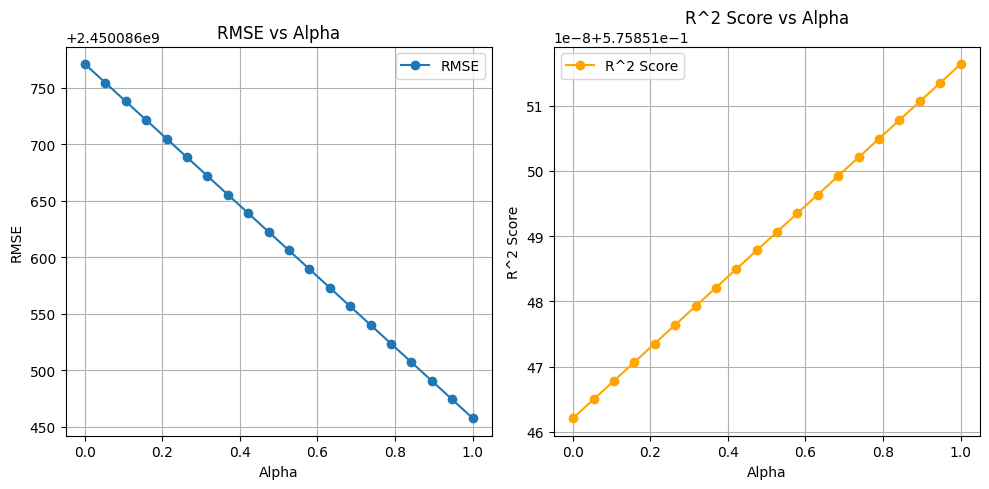

In [88]:
# Plotting RMSE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(alpha_values, rmse_results, marker='o', label='RMSE')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs Alpha')
plt.grid(True)
plt.legend()

# Plotting R^2 Score
plt.subplot(1, 2, 2)
plt.plot(alpha_values, score_results, marker='o', label='R^2 Score', color='orange')
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs Alpha')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Alpha values: [0.001      0.05357895 0.10615789 0.15873684 0.21131579 0.26389474
 0.31647368 0.36905263 0.42163158 0.47421053 0.52678947 0.57936842
 0.63194737 0.68452632 0.73710526 0.78968421 0.84226316 0.89484211
 0.94742105 1.        ]
RMSE results: [49498.351164968044, 49498.3495744767, 49498.34798411827, 49498.34639153542, 49498.34480144292, 49498.343211483356, 49498.34162165671, 49498.340031963, 49498.33844240221, 49498.33685297434, 49498.335263679415, 49498.3336745174, 49498.33208548831, 49498.33049659217, 49498.32890782893, 49498.32731919863, 49498.32573070126, 49498.32414233681, 49498.32255410529, 49498.3209660067]
Score results: [0.5758514626033264, 0.5758514898609846, 0.5758515171163638, 0.5758515444098642, 0.5758515716606842, 0.5758515989092253, 0.5758516261554876, 0.5758516533994706, 0.5758516806411749, 0.5758517078806002, 0.5758517351177465, 0.5758517623526139, 0.5758517895852023, 0.5758518168155118, 0.5758518440435423, 0.5758518712692937, 0.5758518984927663, 0.5758519257

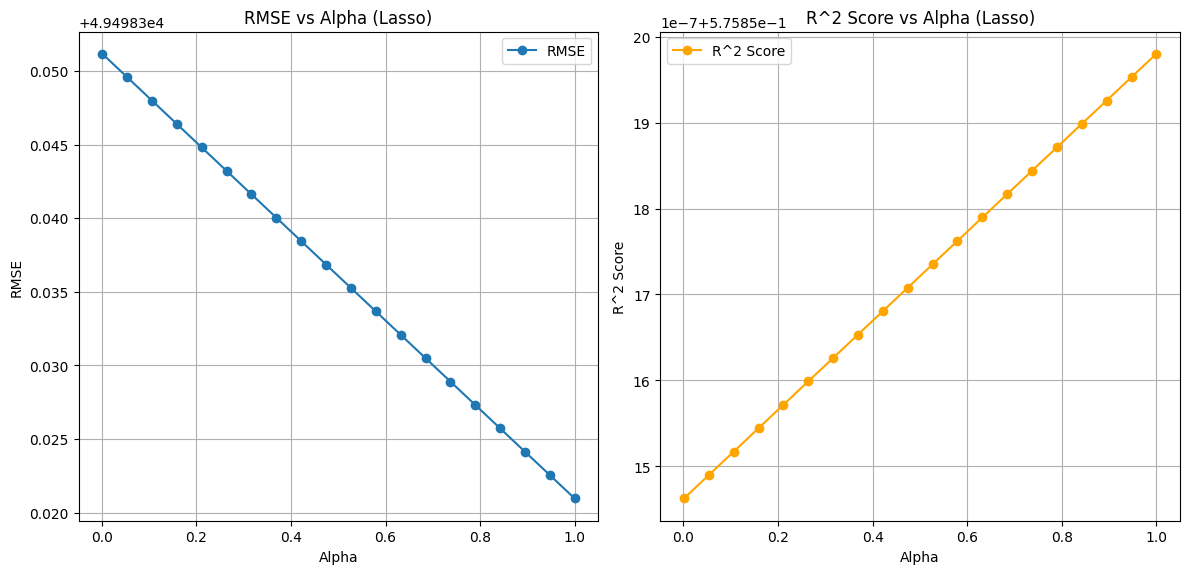

In [91]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define a range of alpha values to iterate over
alpha_values = np.linspace(0.001, 1, 20)
rmse_results = []
score_results = []

for alpha in alpha_values:
    # Create a Lasso Regression model with the current alpha value
    lasso = Lasso(alpha=alpha, max_iter=10000)  # max_iter is set high to ensure convergence
    
    # Train the model
    lasso.fit(x_train, y_train)
    
    # Calculate and store the R^2 score for the test set
    lasso_score = lasso.score(x_test, y_test)
    score_results.append(lasso_score)
    
    # Predict the target values for the test set
    y_hat_lasso = lasso.predict(x_test)
    
    # Calculate RMSE for Lasso Regression and store it
    rmse_lasso = mean_squared_error(y_test, y_hat_lasso, squared=False)
    rmse_results.append(rmse_lasso)

# Print the results
print("Alpha values:", alpha_values)
print("RMSE results:", rmse_results)
print("Score results:", score_results)

# Plotting RMSE and R² Score against Alpha values
plt.figure(figsize=(12, 6))

# Plotting RMSE
plt.subplot(1, 2, 1)
plt.plot(alpha_values, rmse_results, marker='o', label='RMSE')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs Alpha (Lasso)')
plt.grid(True)
plt.legend()

# Plotting R^2 Score
plt.subplot(1, 2, 2)
plt.plot(alpha_values, score_results, marker='o', label='R^2 Score', color='orange')
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs Alpha (Lasso)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [100]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=8 , shuffle= True , random_state= 42)
knn = KNeighborsRegressor()
cv_results = cross_val_score(knn , x, y , cv = kf)

cv_results

print(np.mean(cv_results) , np.std(cv_results))

0.485540881422916 0.0059670791215100105


In [101]:
print(np.quantile(cv_results , [0.025, 0.975]))

[0.47728762 0.49611267]


In [103]:
x = df[['SquareFeet', 'Bedrooms', 'Bathrooms']].values
y = df['Price'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=42)

knn.fit(x_train , y_train)

y_hat_knn = knn.predict(x_test)
rmse_knn = mean_squared_error(y_test , y_hat_knn, squared= False)
print(rmse_knn)

print(knn.score(x_test, y_test))


54056.724755151045
0.49413344622675226


In [104]:
kf = KFold(n_splits=8 , shuffle= True , random_state= 42)
knn = KNeighborsRegressor()
cv_results = cross_val_score(lr , x, y , cv = kf)

cv_results

print(np.mean(cv_results) , np.std(cv_results))

0.5697741688426069 0.007429604761578406
